## Data cleaning and preprocessing

Data cleaning steps
1. Clean body of each dataset, exctracting just the words
2. Remove non-english rows using langdetect
3. Combine all datasets

We only combine in the last step as the datasets are large.

In [1]:
import pandas as pd
import re

In [2]:
def cleaning(text):

    # Ensure correct data type
    text = str(text) 

    # Lowercasing
    text = text.lower()
    
    text = re.sub(r'^(from|to|cc|bcc|subject|sent|date):.*?\n', '', text, flags=re.MULTILINE | re.IGNORECASE) # Remove email headers
    text = re.sub(r"https?://\S+|www\.\S+", "", text)  # Remove URLs
    text = re.sub(r"^(subject: re :|subject:)\s*", "", text) # Remove repetitive words
    text = re.sub(r"[^a-z\s]", "", text)  # Keep only alphabets and spaces (removes non-Latin characters like Chinese, Korean)
    text = re.sub("\n", " ", text) # Remove new line indicator
    text = re.sub(r'\s+', ' ', text).strip() # Remove excessive whitespace

    return text

In [3]:
# pip install langdetect

In [4]:
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException

In [5]:
def get_language(text):
    try:
        cleaned_text = str(text).strip()
        if not cleaned_text:
            return 'empty' 
        lang = detect(cleaned_text)
        return lang
    
    except LangDetectException:
        # cannto detect language
        return 'unknown'
    
    except Exception as e:
        # in case of unexpected error
        return 'error'

In [6]:
df = pd.read_csv("../data/raw/emails.csv")
df['body'] = df['text']
df['label'] = df['spam']
df['cleaned_body'] = df['body'].apply(cleaning)
df['language'] = df['cleaned_body'].apply(get_language)

In [7]:
df['language'].value_counts()

language
en    5673
pl      27
nl       5
fr       4
de       3
pt       3
it       2
sw       2
es       2
tr       1
cy       1
no       1
ca       1
af       1
sv       1
sl       1
Name: count, dtype: int64

In [8]:
df[df['language'] != 'en'].sample(5) # checking

,text,spam,body,label,cleaned_body,language
592,Subject: free lancer eventos free lancer even...,1,Subject: free lancer eventos free lancer even...,1,free lancer eventos free lancer eventos servio...,pt
5696,Subject: re : lunch super . jestesmy umowieni...,0,Subject: re : lunch super . jestesmy umowieni...,0,lunch super jestesmy umowieni juliusz vince j ...,pl
115,Subject: fw : i ' m unwell . in 1839 not at a...,1,Subject: fw : i ' m unwell . in 1839 not at a...,1,fw i m unwell in not at all soccerwe are here ...,it
3783,"Subject: lunch dzien dobry , mam nadzieje , ...",0,"Subject: lunch dzien dobry , mam nadzieje , ...",0,lunch dzien dobry mam nadzieje ze nic sie nie ...,pl
431,Subject: kime oy vereceksiniz ? ?yi g?nler d...,1,Subject: kime oy vereceksiniz ? ?yi g?nler d...,1,kime oy vereceksiniz yi gnler dnya gazetesi ii...,tr


In [9]:
df1 = df.loc[df['language'] == 'en', ['body','cleaned_body', 'label']]
df1.sample(2)

,body,cleaned_body,label
1430,"Subject: "" we are one @ enron . com ! "" : fina...",we are one enron com final notice please be aw...,0
3306,Subject: re : confirm participation at real op...,confirm participation at real options conferen...,0


In [10]:
df = pd.read_csv("../data/raw/spam_ham_dataset.csv")
df['body'] = df['text']
df['label'] = df['label_num']
df['cleaned_body'] = df['body'].apply(cleaning)
df['language'] = df['cleaned_body'].apply(get_language)

In [11]:
df['language'].value_counts()

language
en       4890
empty     110
ca         55
es         25
nl         22
fr         12
de          9
cy          8
pl          4
cs          4
sl          3
sk          3
it          3
pt          3
fi          3
so          3
sv          2
da          2
hr          2
et          2
id          1
lt          1
af          1
ro          1
sw          1
hu          1
Name: count, dtype: int64

In [12]:
df.loc[4407]['body'] # we can see that the cleaned body is empty as the body only had subject without content so we can remove them

'Subject: discreet cheapest pr ! escription d \\ rugs online !\r\n'

In [13]:
df[df['language'] == 'empty'].sample(2)

,Unnamed: 0,label,text,label_num,body,cleaned_body,language
1594,4269,1,Subject: women change your life\r\n,1,Subject: women change your life\r\n,,empty
2550,3835,1,Subject: multiple ways to get home loans .\r\n,1,Subject: multiple ways to get home loans .\r\n,,empty


In [14]:
df2 = df.loc[df['language'] == 'en', ['body','cleaned_body', 'label']] # removes all entries that are not english
df2.sample(2)

,body,cleaned_body,label
1866,Subject: didn ' t make the alumni list ?\r\nyo...,you deserve a co llege dipl oma missing a piec...,1
1094,Subject: re : industrial report\r\nrobert e ll...,robert e lloyd ect am to pat clynes corp enron...,0


In [22]:
df = pd.concat([df1,df2], ignore_index=True)

""""
df = pd.read_csv("../raw/spam_ham_dataset.csv")
df['body'] = df['text']
df['label'] = df['label_num']
df['cleaned_body'] = df['body'].apply(cleaning)
df['language'] = df['cleaned_body'].apply(get_language)
df1 = df.loc[df['language'] == 'en', ['body','cleaned_body', 'label']]
"""

lst_standard_datasets = ["CEAS_08.csv", "Enron.csv", "Ling.csv", "SpamAssasin.csv", "TREC_07.csv", "Nigerian_5.csv", "Nazario_5.csv"]

for dataset in lst_standard_datasets:
    temp_df = pd.read_csv("../data/raw/"+dataset)[['body','label']]
    temp_df['cleaned_body'] = temp_df['body'].apply(cleaning)
    temp_df['language'] = temp_df['cleaned_body'].apply(get_language)
    df = pd.concat([df, temp_df.loc[temp_df['language'] == 'en', ['body', 'cleaned_body', 'label']]], ignore_index=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149367 entries, 0 to 149366
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   body          149367 non-null  object
 1   cleaned_body  149367 non-null  object
 2   label         149367 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 3.4+ MB


In [25]:
df.sample(5)

,body,cleaned_body,label
53975,cd\nlabeling kit\n$ 12 . 00\ntdk ' s complete ...,cd labeling kit tdk s complete labeling soluti...,1
15899,"\n\nTo view this email as a web page, follow t...",to view this email as a web page follow the li...,0
99480,"Hi,\n\nI'm wrestling with an analysis of a dat...",hi im wrestling with an analysis of a dataset ...,0
48662,\n\nCNN Alerts: My Custom Alert\n\n\n\n\n\n\n ...,cnn alerts my custom alert alert name my custo...,1
140109,"John/Gerald, We are currently trading under GT...",johngerald we are currently trading under gtc ...,0


In [26]:
df.isna().sum()

body            0
cleaned_body    0
label           0
dtype: int64

In [27]:
df['cleaned_body'].duplicated().sum()

23439

In [28]:
df.drop_duplicates(subset = ['cleaned_body'], inplace=True)
df['cleaned_body'].duplicated().sum()

0

In [29]:
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

## Feature Engineering (POS Tagging) (needs to be done before the words are preprocessed where there's inevitable removal of some info)

Explanation:
The order of POS tags might be a strong signal. Certain patterns might be more common in spam messages than in legitimate texts. For example:
1. direct commands followed by a noun. POS Tag sequence: Verb (VB*) → Determiner (DT) → Noun (NN*) E.g. "Claim this prize (now!)"
2. aggressively combining adjectives with action-driven verbs. POS Tag sequence: Verb (VB*) → Adjective (JJ) → Noun (NN*) E.g. "Get amazing rewards (today!)"
3. use of urgency-driven modals. POS Tag sequence: Noun (NN/NNS) → Modal Verb (MD) → Verb (VB) E.g. "You must act (now!)"

Assumptions made: Minimal spelling errors made, sentences are grammatically accurate and nltk's `pos_tag()` function is reliable

In [30]:
##############################################
#              ADDED POS TAGGING HERE
##############################################

def get_pos_tags(text): #str -> list of POS tags 
    try:
        tokens = nltk.word_tokenize(text)
        tags = [tag for word, tag in nltk.pos_tag(tokens)]
        return tags
    except Exception:
        return [] # Handle potential errors

def count_vb_dt_nn(pos_tags):
    """
    Counts occurrences of the POS tag sequence: 
    - VB* (any verb form) 
    - DT (determiner) 
    - NN* (any noun form)
    """
    pattern = re.compile(r'VB\w* DT NN\w*')  # Regex to match VB* -> DT -> NN*
    # Convert list into a space-separated string of POS tags
    pos_sequence = " ".join(pos_tags)
    # Find all matches
    matches = pattern.findall(pos_sequence)
    return len(matches)

def count_vb_jj_nn(pos_tags):
    """
    Counts occurrences of the POS tag sequence: 
    - VB* (any verb form) 
    - JJ (adjective) 
    - NN* (any noun form)
    """
    pattern = re.compile(r'VB\w* JJ NN\w*')
    # Convert list into a space-separated string of POS tags
    pos_sequence = " ".join(pos_tags)
    # Find all matches
    matches = pattern.findall(pos_sequence)
    return len(matches)

def count_nn_md_vb(pos_tags):
    """
    Counts occurrences of the POS tag sequence: 
    - NN* (any noun form) 
    - MD (modal e.g. must, should) 
    - VB* (any verb form)
    """
    pattern = re.compile(r'NN\w* MD VB\w*') 
    # Convert list into a space-separated string of POS tags
    pos_sequence = " ".join(pos_tags)
    # Find all matches
    matches = pattern.findall(pos_sequence)
    return len(matches)

##############################################
#           ADDED POS TAGGING HERE
##############################################

df['pos_tags'] = df['cleaned_body'].apply(get_pos_tags)
df['percentage_vb_dt_nn'] = (df['pos_tags'].apply(count_vb_dt_nn)) / (df['pos_tags'].apply(len)) * 100
df['percentage_vb_jj_nn'] = (df['pos_tags'].apply(count_vb_jj_nn)) / (df['pos_tags'].apply(len)) * 100
df['percentage_nn_md_vb'] = (df['pos_tags'].apply(count_nn_md_vb)) / (df['pos_tags'].apply(len)) * 100

In [31]:
df.head()

,body,cleaned_body,label,pos_tags,percentage_vb_dt_nn,percentage_vb_jj_nn,percentage_nn_md_vb
0,Subject: naturally irresistible your corporate...,naturally irresistible your corporate identity...,1,"[RB, JJ, PRP$, JJ, NN, NN, VBZ, RB, JJ, TO, VB...",3.743316,2.139037,1.069519
1,Subject: the stock trading gunslinger fanny i...,the stock trading gunslinger fanny is merrill ...,1,"[DT, NN, NN, NN, NN, VBZ, RB, CC, VBZ, RB, JJ,...",0.000000,0.000000,0.000000
2,Subject: unbelievable new homes made easy im ...,unbelievable new homes made easy im wanting to...,1,"[JJ, JJ, NNS, VBN, JJ, JJ, VBG, TO, VB, PRP, D...",1.351351,0.000000,0.000000
3,Subject: 4 color printing special request add...,color printing special request additional info...,1,"[NN, VBG, JJ, NN, JJ, NN, RB, VBZ, RB, NN, RB,...",1.562500,4.687500,0.000000
4,"Subject: do not have money , get software cds ...",do not have money get software cds from here s...,1,"[VBP, RB, VB, NN, NN, NN, NNS, IN, RB, NN, NN,...",2.564103,2.564103,0.000000


## Data preprocessing steps
1. Tokenization
2. Remove stop words
3. Lemmatization
-- we choose to perform lemmatization instead of stemming to identify the original meaning of the word

In [ ]:
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()
    
def preprocess(text):
    words = word_tokenize(text)
    
    # Remove stopwords
    words = [word for word in words if word not in stop_words]
    
    # Lemmatization
    words = [lemmatizer.lemmatize(word) for word in words]

    return words


In [ ]:
df.head(5)

In [ ]:
df.to_csv('../data/processed/full_df.csv', index = False)

Split into training and testing sets

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
labels = df['label'].tolist()

In [31]:
df_copy = df
clean_content = df_copy['cleaned_body'].to_list(); clean_content[:10]

['subject naturally irresistible your corporate identity lt is really hard to recollect a company the market is full of suqgestions and the information isoverwhelminq but a good catchy logo stylish statlonery and outstanding website will make the task much easier we do not promise that havinq ordered a iogo your company will automaticaily become a world ieader it isguite ciear that without good products effective business organization and practicable aim it will be hotat nowadays market but we do promise that your marketing efforts will become much more effective here is the list of clear benefits creativeness hand made original logos specially done to reflect your distinctive company image convenience logo and stationery are provided in all formats easy to use content management system letsyou change your website content and even its structure promptness you will see logo drafts within three business days affordability your marketing break through shouldn t make gaps in your budget sa

In [32]:
# split test and train 80-20
train_df, test_df = train_test_split(df, test_size=0.20, random_state=4263, stratify=df_copy['label'])

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

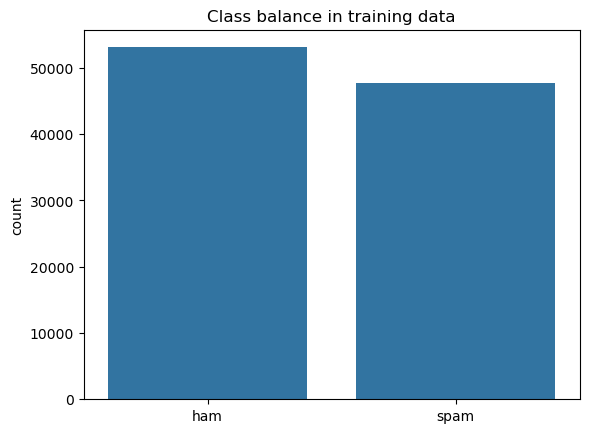

In [34]:
count = train_df['label'].value_counts()
labels = {0:'ham', 1:'spam'}

ax = sns.barplot(x = labels, y = count).set_title("Class balance in training data")

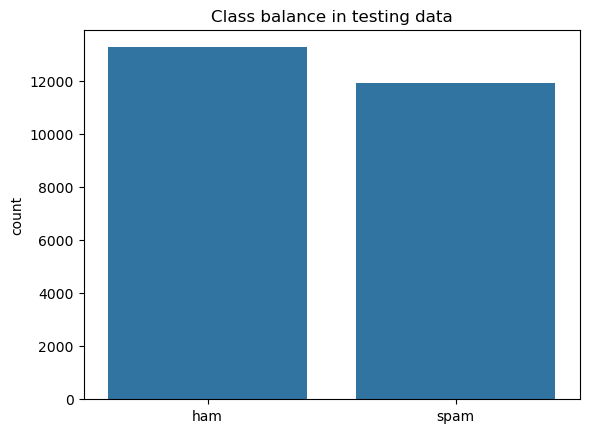

In [35]:
count = test_df['label'].value_counts()
labels = {0:'ham', 1:'spam'}

ax = sns.barplot(x = labels, y = count).set_title("Class balance in testing data")

In [ ]:
train_df.to_csv('../data/processed/training.csv', index = False)
test_df.to_csv('../data/processed/testing.csv', index = False)